In [294]:
import numpy as np
import pandas as pd

In [295]:
df = pd.read_csv('new_final.csv')

In [296]:
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [237]:
#way to split the data into labels and features
#df1=df[df['delay']!=0]
df1=df
labels = df1.delay
#df.drop(["delay"],axis=1,inplace=True)
df1=df1.fillna(0)
features = df1.drop(['delay'],axis=1)


In [238]:
from sklearn.model_selection import KFold

In [239]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.2,random_state=42)

In [240]:
from sklearn import linear_model

lasso = linear_model.Lasso()

In [241]:
lasso.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [242]:
y_pred = lasso.predict(x_test)

In [297]:
r2_score(y_pred,y_test)

0.9245667943079435

In [303]:
LassoCV = linear_model.Lasso()

In [304]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LassoCV, features, labels, cv=5)
scores

C:\Users\aksha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63078.223366800696, tolerance: 33374.759573430034
  positive)


array([0.85562819, 0.81270615, 0.93782421, 0.74014803, 0.91274156])

In [305]:
from sklearn.metrics import f1_score,accuracy_score,mean_squared_error,r2_score
# f1_score(y_test, y_pred, average='weighted')
# accuracy_score(y_test, y_pred, normalize=False)
mean_squared_error(y_test,y_pred)

270.71246212681086

In [306]:
np.sqrt(mean_squared_error(y_test,y_pred))

16.453341974407838

In [307]:
#R2 after k-fold CV
r2_score(y_test,y_pred)

0.9337758279855589

In [ ]:
##RIDGE

In [309]:
ridge = linear_model.Ridge()

In [311]:
ridge.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [312]:
y_pred = ridge.predict(x_test)

In [313]:
r2_score(y_pred,y_test)

0.9348961722932567

In [314]:
RidgeCV = linear_model.Ridge()

In [319]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RidgeCV, features, labels, cv=5)
scores

array([0.7464264 , 0.83446332, 0.94610835, 0.75725243, 0.92443351])

In [320]:
from sklearn.metrics import f1_score,accuracy_score,mean_squared_error,r2_score
mean_squared_error(y_test,y_pred)

238.18835764460243

In [321]:
np.sqrt(mean_squared_error(y_test,y_pred))

15.433352119504123

In [322]:
#R2 after k-fold CV
r2_score(y_test,y_pred)

0.9417321735225311

In [276]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure 

In [222]:
sns.set(color_codes=True)

C:\Users\aksha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.00366e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\aksha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.79992e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\aksha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.72524e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\aksha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.18239e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\aksha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.00205e-

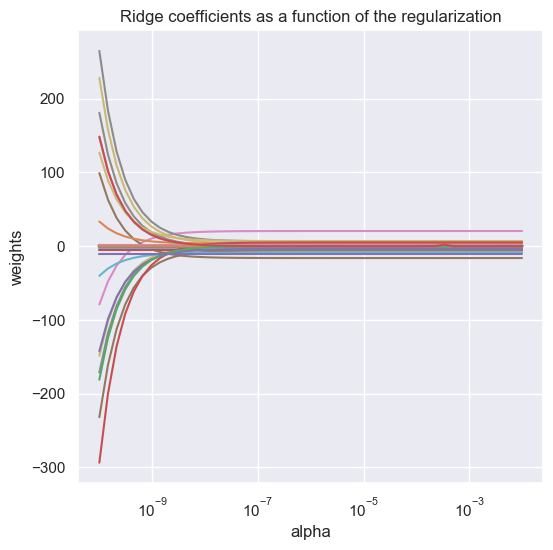

In [282]:
n_alphas = 50
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(x_train, y_train)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results
#fig=figure(figsize=(1,1))
plt.figure(
    figsize=(6, 6),
    dpi=100)
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

.

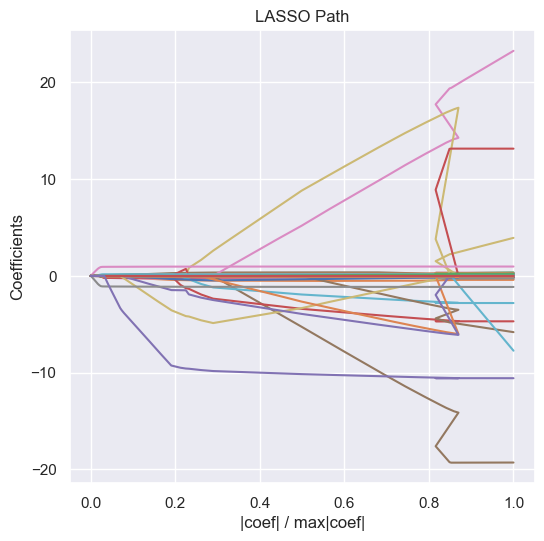

In [293]:
alphas, _, coefs = linear_model.lars_path(np.array(features), np.array(labels), method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]
plt.figure(
    figsize=(6, 6),
    dpi=100)

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
#plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()